In [93]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import gensim
import numpy as np
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
# from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary

In [94]:
train2= pd.read_csv('traindata2.tsv', engine='python', error_bad_lines=False, delimiter='\t')
train2.head()

,comment_id,comment,label,influencer,influencer_gender,media
0,52564,"En vez de la magia de mi melena, la magia de m...",NO,dalas,man,instagram
1,32984,"A ver, los milenials y la gente normal necesit...",NO,soyunapringada,woman,youtube
2,58447,Me encanta todo el contenido que haces se nota...,NO,wildhater,man,instagram
3,10341,a Laura sige así que vales mucho más que 10 o ...,NO,lauraescane,woman,youtube
4,53087,"Y si no mes gusta Dalas, que hacen aquí,lárgue...",NO,dalas,man,instagram


We'll analyse the data depending on the labels

In [95]:
train2.groupby('label').count()

,comment_id,comment,influencer,influencer_gender,media
label,,,,,
NO,13212,13212,13212,13212,13212
NOM,1235,1235,1235,1235,1235
OFG,212,212,212,212,212
OFP,2051,2051,2051,2051,2051


In [96]:
train2.groupby('label').describe()

comment_id                                                       \
           count          mean           std   min       25%      50%   
label                                                                   
NO       13212.0  30854.272404  17655.094537   0.0  15607.75  31242.0   
NOM       1235.0  29871.959514  16967.872876  40.0  15272.00  29902.0   
OFG        212.0  27191.372642  17671.654202  45.0  11501.00  25032.5   
OFP       2051.0  29422.713311  17052.697265  35.0  14702.50  28638.0   

                         
           75%      max  
label                    
NO     46521.5  59998.0  
NOM    43936.0  59990.0  
OFG    42968.5  59745.0  
OFP    44193.0  59982.0

We'll see how long is every element of the data frame and we'll create another column with the length of each row

In [97]:
train2['length']=train2['comment'].apply(len)

In [98]:
train2.head()

,comment_id,comment,label,influencer,influencer_gender,media,length
0,52564,"En vez de la magia de mi melena, la magia de m...",NO,dalas,man,instagram,56
1,32984,"A ver, los milenials y la gente normal necesit...",NO,soyunapringada,woman,youtube,135
2,58447,Me encanta todo el contenido que haces se nota...,NO,wildhater,man,instagram,165
3,10341,a Laura sige así que vales mucho más que 10 o ...,NO,lauraescane,woman,youtube,81
4,53087,"Y si no mes gusta Dalas, que hacen aquí,lárgue...",NO,dalas,man,instagram,560


We'll see the distribution of the lenght of the data set

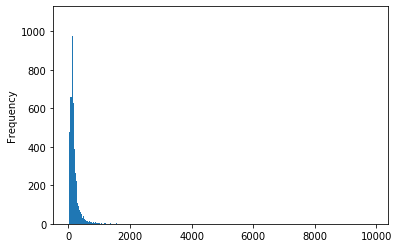

In [99]:
train2['length'].plot.hist(bins=1000)

In [100]:
train2['length'].describe()

count    16710.000000
mean       172.339078
std        209.464901
min          3.000000
25%         84.000000
50%        134.000000
75%        199.000000
max       9887.000000
Name: length, dtype: float64

And the distribution of the lenght depending on the label

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b32b6cc50>,
      dtype=object)

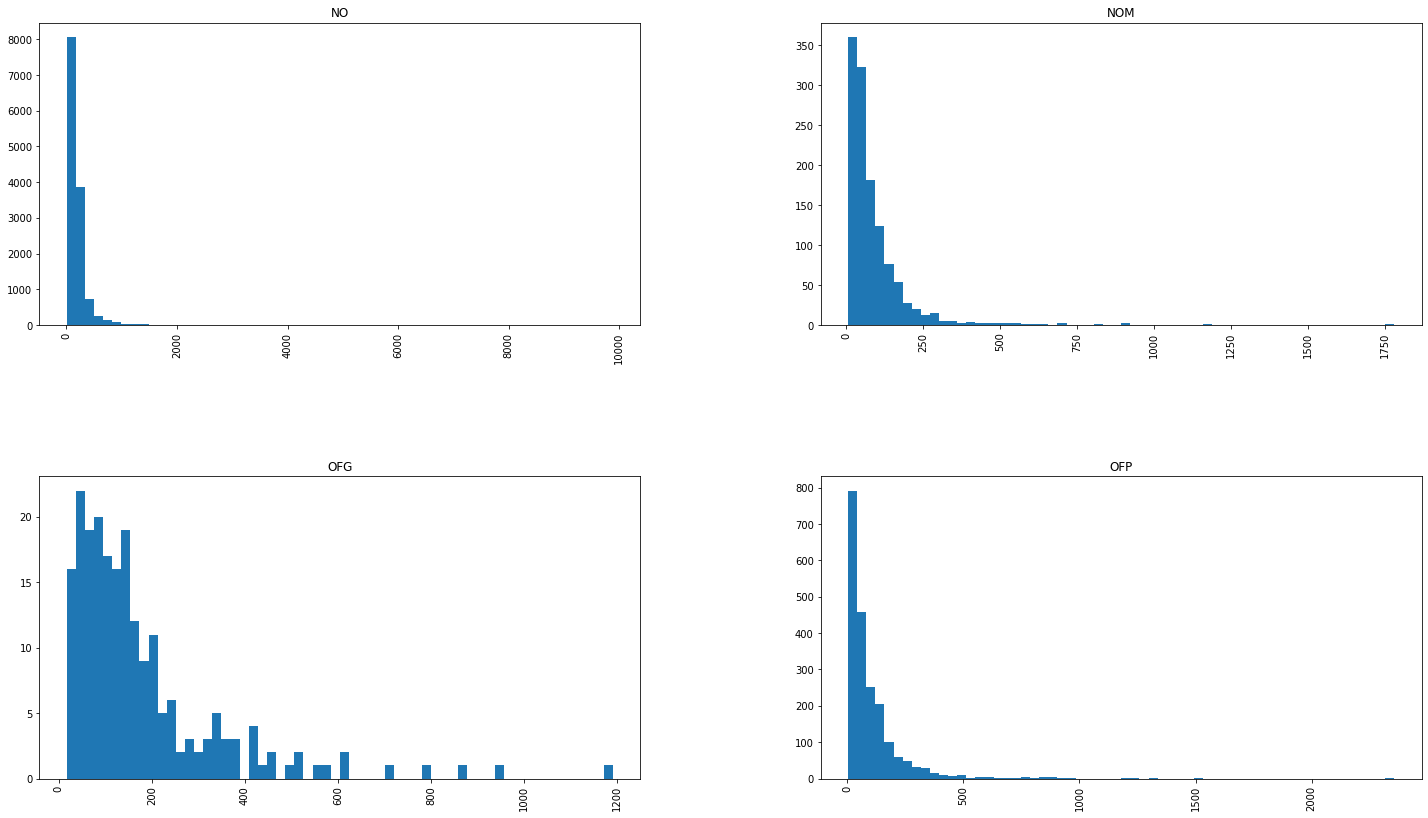

In [101]:
train2.hist(column='length', by='label', bins=60, figsize=(24,14))

In [102]:
import string

In [103]:
from nltk.corpus import stopwords

We're going to write a function that removes the puntuation symbols, remove stop words and returned a clean list of words

In [104]:
def text_process(mess):
    """
    1.remove punc
    2.remove stop words
    3.return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('spanish')]

In [105]:
train2.comment.head(5).apply(text_process)

0               [vez, magia, melena, magia, nariz, xD]
1    [ver, milenials, gente, normal, necesitamos, p...
2    [encanta, contenido, haces, nota, curras, vide...
3    [Laura, sige, así, vales, 10, 20, 30, estúpido...
4    [si, mes, gusta, Dalas, hacen, aquílárguense, ...
Name: comment, dtype: object

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

In [107]:
# bow_transformer =  CountVectorizer(analyzer=text_process).fit(train2['comment'])


In [108]:
# print(len(bow_transformer.vocabulary_))

In [109]:
# messages_bow =  bow_transformer.transform(train2['comment'])

In [110]:
# print('Shape of Sparse Matrix:', messages_bow.shape)
# print('Amount of Non-Zero occurences: ', messages_bow.nnz)

In [111]:
# sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
# print('sparsity: {}'.format(sparsity))

In [112]:
from sklearn.feature_extraction.text import TfidfTransformer


In [113]:
# tfidf_transformer = TfidfTransformer().fit(messages_bow)


In [114]:
# messages_tfidf = tfidf_transformer.transform(messages_bow)


In [115]:
from sklearn.naive_bayes import MultinomialNB


In [116]:
train2[['comment', 'influencer', 'influencer_gender', 'media']].size

66840

We're going to create a pipeline that does the Naive bayes predictor

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [118]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classfier', MultinomialNB())
    
])

In [119]:
train2[['comment', 'influencer', 'influencer_gender', 'media']]

,comment,influencer,influencer_gender,media
0,"En vez de la magia de mi melena, la magia de m...",dalas,man,instagram
1,"A ver, los milenials y la gente normal necesit...",soyunapringada,woman,youtube
2,Me encanta todo el contenido que haces se nota...,wildhater,man,instagram
3,a Laura sige así que vales mucho más que 10 o ...,lauraescane,woman,youtube
4,"Y si no mes gusta Dalas, que hacen aquí,lárgue...",dalas,man,instagram
...,...,...,...,...
16705,Hijo de tu puta madre estoy mamadisimo 😎,dalas,man,instagram
16706,"yo que hace 4 años lo veía, ahora me doy cuent...",dalas,man,twitter
16707,Esta re blanco el wismi,wismichu,man,youtube
16708,algo que no veo en esa botella rosada es que s...,windygirk,woman,youtube


In [120]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comment_id         16710 non-null  int64 
 1   comment            16710 non-null  object
 2   label              16710 non-null  object
 3   influencer         16710 non-null  object
 4   influencer_gender  16710 non-null  object
 5   media              16710 non-null  object
 6   length             16710 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 914.0+ KB


In [121]:
train2['label'].size

16710

In [122]:
# pipeline.fit(train2[['comment', 'influencer', 'influencer_gender', 'media']], train2['label'])

In [123]:
# predictions_test_set = pipeline.predict(train2['comment'])


In [124]:
# predictions_test_set

In [125]:
# from sklearn.metrics import classification_report

In [126]:
# print(classification_report(train2.comment, predictions_test_set))

This dataset, no only has a column with language data, it got more columns with categorical data. So that we are going to create 2 pipelines, 1 for the text data and another one for the categorical, and then we wil process both and apply the algorithm

In [127]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC

In [144]:
X_train=train2.drop(columns='label')

X_train


,comment_id,comment,influencer,influencer_gender,media,length
0,52564,"En vez de la magia de mi melena, la magia de m...",dalas,man,instagram,56
1,32984,"A ver, los milenials y la gente normal necesit...",soyunapringada,woman,youtube,135
2,58447,Me encanta todo el contenido que haces se nota...,wildhater,man,instagram,165
3,10341,a Laura sige así que vales mucho más que 10 o ...,lauraescane,woman,youtube,81
4,53087,"Y si no mes gusta Dalas, que hacen aquí,lárgue...",dalas,man,instagram,560
...,...,...,...,...,...,...
16705,57470,Hijo de tu puta madre estoy mamadisimo 😎,dalas,man,instagram,40
16706,35,"yo que hace 4 años lo veía, ahora me doy cuent...",dalas,man,twitter,70
16707,18564,Esta re blanco el wismi,wismichu,man,youtube,23
16708,46485,algo que no veo en esa botella rosada es que s...,windygirk,woman,youtube,369


In [145]:

# pipeline for text data
text_features = 'comment'
text_transformer = Pipeline(steps=[
#     ('bow', CountVectorizer(analyzer=text_process)),
    ('vectorizer', TfidfVectorizer(stop_words="english"))
])

# pipeline for categorical data
categorical_features = ['influencer', 'influencer_gender', 'media',]
categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# you can add other transformations for other data types

# combine preprocessing with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, text_features),
        ('cat', categorical_transformer, categorical_features)
])

# add model to be part of pipeline
clf_pipe =  Pipeline(steps=[('preprocessor', preprocessor),
                   ("model", SVC())
])

# ...

## you can just use preprocessor by itself
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)
# clf_s= SVC().fit(X_train, y_train)
# clf_s.score(X_test, y_test)

## or better, you can use the whole.
# clf_pipe.fit(X_train, y_train) 
# clf_pipe.score(X_test, y_test)

In [146]:
X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)
clf_s= SVC(probability=True).fit(X_train, train2['label'])
clf_s.score(X_train, train2['label'])

# # or better, you can use the whole.
# clf_pipe.fit(X_train, train2['label']) 
# clf_pipe.score(X_train, train2['label'])

0.8941352483542788

Let's get the predictions

In [147]:
predictions = clf_s.predict(X_train)

We're going to get the classification report

In [148]:
from sklearn.metrics import classification_report


In [149]:
print(classification_report(train2['label'], predictions))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          NO       0.89      1.00      0.94     13212
         NOM       0.89      0.61      0.72      1235
         OFG       0.00      0.00      0.00       212
         OFP       0.95      0.50      0.65      2051

    accuracy                           0.89     16710
   macro avg       0.68      0.53      0.58     16710
weighted avg       0.89      0.89      0.88     16710



In [150]:
prob = clf_s.predict_proba(X_train)

In [151]:
prob[0]

array([0.95256831, 0.02384341, 0.00711743, 0.01647085])

Now we are going to apply the train model to the test data

In [152]:
test2= pd.read_csv('testdata2.tsv', engine='python', error_bad_lines=False, delimiter='\t')
test2['length']=test2['comment'].apply(len)
test2.head()

,comment_id,comment,influencer,influencer_gender,media,length
0,54745,Lacasito moreno,wismichu,man,instagram,15
1,5595,Yo pensaba que celopan era gay,miare,woman,youtube,30
2,53477,la bruja del 77,miare,woman,instagram,15
3,7385,Se va a liar bien gorda,wildhater,man,youtube,23
4,551,Y Ami que chucha me importa boliviano hijodeputa,dalas,man,twitter,48


In [153]:
# train2.head()

let's process the test data to the format where I can apply the algorithm

In [154]:
# X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(test2)
# clf_s= SVC(probability=True).fit(X_train, train2['label'])
# clf_s.score(X_train, train2['label'])

Now let's get the predictions for the test data

In [155]:
predictions = clf_s.predict(X_test)


In [156]:
predictions


array(['NO', 'NO', 'NO', ..., 'NOM', 'NO', 'NO'], dtype=object)

Now let's get the probability of the predictions

In [157]:
prob = clf_s.predict_proba(X_test)


In [158]:
prob

array([[0.91708423, 0.02517342, 0.00133069, 0.05641166],
       [0.87976177, 0.02707163, 0.00309813, 0.09006847],
       [0.83866361, 0.0280262 , 0.00867814, 0.12463205],
       ...,
       [0.04787335, 0.84585294, 0.00960414, 0.09666957],
       [0.97854593, 0.01146768, 0.00554343, 0.00444296],
       [0.87530643, 0.03273736, 0.00586198, 0.08609423]])

Let's make a data frame to be able to save it later and to summit the solutions

In [159]:
df_predict_test=pd.DataFrame(prob) 
df_predict_test.head()

,0,1,2,3
0,0.917084,0.025173,0.001331,0.056412
1,0.879762,0.027072,0.003098,0.090068
2,0.838664,0.028026,0.008678,0.124632
3,0.351927,0.170690,0.049977,0.427406
4,0.742179,0.034441,0.012766,0.210614


In [160]:
df3 = df_predict_test.assign(ColumnA = '[' + df_predict_test[0].astype(str) + ', ' +
  df_predict_test[1].astype(str) + ', ' +df_predict_test[2].astype(str) + ', ' +
  df_predict_test[3].astype(str) + ']' )
df3

,0,1,2,3,ColumnA
0,0.917084,0.025173,0.001331,0.056412,"[0.9170842303970184, 0.025173423512497486, 0.0..."
1,0.879762,0.027072,0.003098,0.090068,"[0.8797617733404929, 0.02707162528952854, 0.00..."
2,0.838664,0.028026,0.008678,0.124632,"[0.8386636088162699, 0.02802620199377484, 0.00..."
3,0.351927,0.170690,0.049977,0.427406,"[0.3519268351000203, 0.1706900316447558, 0.049..."
4,0.742179,0.034441,0.012766,0.210614,"[0.7421787791075393, 0.0344409883468957, 0.012..."
...,...,...,...,...,...
13601,0.985730,0.006919,0.000725,0.006626,"[0.9857300180648586, 0.006919110624112608, 0.0..."
13602,0.965689,0.008821,0.004398,0.021092,"[0.9656885570107631, 0.008821494794838933, 0.0..."
13603,0.047873,0.845853,0.009604,0.096670,"[0.04787334593464807, 0.8458529401050005, 0.00..."
13604,0.978546,0.011468,0.005543,0.004443,"[0.9785459285263222, 0.011467680024740556, 0.0..."


In [162]:
df_final = pd.DataFrame()
df_final['id']=list(test2.comment_id)
df_final['Labels']=list(predictions)
df_final['Prob']= df3.ColumnA

df_final.head()


,id,Labels,Prob
0,54745,NO,"[0.9170842303970184, 0.025173423512497486, 0.0..."
1,5595,NO,"[0.8797617733404929, 0.02707162528952854, 0.00..."
2,53477,NO,"[0.8386636088162699, 0.02802620199377484, 0.00..."
3,7385,NO,"[0.3519268351000203, 0.1706900316447558, 0.049..."
4,551,NO,"[0.7421787791075393, 0.0344409883468957, 0.012..."


In [163]:
# df_final = pd.DataFrame()
# df_final['id']=list(test2.comment_id)
# df_final['Labels']=list(predictions)
# df_final['Prob']= list(prob)


# print(df_final.str.cat(sep='\n'))

In [165]:
df_final.to_csv('ContextTestOffenES.tsv', sep='\t', header=False, index=False)


In [ ]:

with open('output.tsv', 'w') as outfile:
    for x in df_final.iterrows():
        outfile.write(str(x))


In [ ]:
for x in df_final.iterrows():
    print(x)

In [ ]:
import csv
df_final.to_csv('ContextTestOffenES.tsv', sep='\t', header=False, index=False)


In [ ]:
df_final_v2 = pd.DataFrame()
df_final_v2['id']=list(test2.comment_id)
df_final_v2['Labels']=list(predictions)
# df_final['Prob']= list(prob)
pd.DataFrame(df_final_v2)

In [ ]:
df_final_v2.to_csv('ContextTestOffenES_v2.tsv', sep='\t', header=False, index=False)


In [ ]:
with open('output2.tsv', 'w') as outfile:
    for x in pd.DataFrame(df_final_v2).iterrows():
        outfile.write(str(x))
        